# 서울 미세먼지 데이터 AirPollutionSeoul

- https://www.kaggle.com/bappekim/air-pollution-in-seoul

Context
This dataset deals with air pollution measurement information in Seoul, South Korea.
Seoul Metropolitan Government provides many public data, including air pollution information, through the 'Open Data Plaza'
I made a structured dataset by collecting and adjusting various air pollution related datasets provided by the Seoul Metropolitan Government

Content
This data provides average values for six pollutants (SO2, NO2, CO, O3, PM10, PM2.5).

Data were measured every hour between 2017 and 2019.
Data were measured for 25 districts in Seoul.
This dataset is divided into four files.
Measurement info: Air pollution measurement information

1 hour average measurement is provided after calibration
Instrument status:
0: Normal, 1: Need for calibration, 2: Abnormal
4: Power cut off, 8: Under repair, 9: abnormal data
Measurement item info: Information on air pollution measurement items

Measurement station info: Information on air pollution instrument stations

Measurement summary: A condensed dataset based on the above three data.

Acknowledgements
Data is provided from here.

https://data.seoul.go.kr/dataList/OA-15526/S/1/datasetView.do
https://data.seoul.go.kr/dataList/OA-15516/S/1/datasetView.do
https://data.seoul.go.kr/dataList/OA-15515/S/1/datasetView.do
Thank you to Seoul City, Seoul Open Data Plaza, and Air Quality Analysis Center for providing data.

## 데이터 불러오기

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
airseoul_df = pd.read_csv('/content/drive/My Drive/kaggle/AirPollutionSeoul/Measurement_summary.csv')
airseoul_df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


미세먼지(PM10) 기준으로 좋음, 보통, 나쁨, 매우나쁨으로 구분<br>
대한민국의 미세먼지 환경기준(일평균)<br>

- 좋음 0\~30<br>
- 보통 \~80<br>
- 나쁨 \~150<br>
- 매우나쁨151\~<br>

4단계로 구분

In [8]:
data = airseoul_df.loc[:,'SO2':'PM2.5']
data

,SO2,NO2,O3,CO,PM10,PM2.5
0,0.004,0.059,0.002,1.2,73.0,57.0
1,0.004,0.058,0.002,1.2,71.0,59.0
2,0.004,0.056,0.002,1.2,70.0,59.0
3,0.004,0.056,0.002,1.2,70.0,58.0
4,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...
647506,0.003,0.028,0.013,0.5,23.0,17.0
647507,0.003,0.025,0.015,0.4,25.0,19.0
647508,0.003,0.023,0.015,0.4,24.0,17.0
647509,0.003,0.040,0.004,0.5,25.0,18.0


### 레이블 추가하기

In [9]:
def func(x):
  if x > 150:
    return 3
  elif x > 80:
    return 2
  elif x > 30:
    return 1
  else:
    return 0

data["target"] = data["PM10"].apply(lambda x : func(x))
data

,SO2,NO2,O3,CO,PM10,PM2.5,target
0,0.004,0.059,0.002,1.2,73.0,57.0,1
1,0.004,0.058,0.002,1.2,71.0,59.0,1
2,0.004,0.056,0.002,1.2,70.0,59.0,1
3,0.004,0.056,0.002,1.2,70.0,58.0,1
4,0.003,0.051,0.002,1.2,69.0,61.0,1
...,...,...,...,...,...,...,...
647506,0.003,0.028,0.013,0.5,23.0,17.0,0
647507,0.003,0.025,0.015,0.4,25.0,19.0,0
647508,0.003,0.023,0.015,0.4,24.0,17.0,0
647509,0.003,0.040,0.004,0.5,25.0,18.0,0


### 훈련 세트, 테스트 세트 분할

- 데이터가 너무 많아 10%만 활용

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
import multiprocessing

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,'SO2':'PM2.5'], data.loc[:,'target'], test_size=0.9)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(64751, 6)
(582760, 6)
(64751,)
(582760,)


### 정규화

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### GridSearchCV 를 이용한 최적 파라미터 찾기

In [31]:
estimator = LogisticRegression()
TF = [True, False]
C = [0.1, 0.5 , 1, 5, 10]
tol = [0.001, 0.005, 0.01, 0.05, 0.1]
penalty = ['l1','l2']
param_grid = {'C':C,
              'penalty':penalty,
              'tol':tol,}

gs = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    cv=5,
    verbose=True
)
result = gs.fit(X_train, y_train)

print("최적의 점수: {}".format(result.best_score_))
print("최적의 파라미터: {}".format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  62 tasks      | elapsed:   41.9s
[Parallel(n_jobs=2)]: Done 250 out of 250 | elapsed:  3.8min finished


최적의 점수: 0.9994285869310191
최적의 파라미터: {'C': 10, 'penalty': 'l2', 'tol': 0.001}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 앙상블로 학습하기

In [19]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score

In [29]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

### VotingClassifier()

In [15]:
model1 = ExtraTreesClassifier()
model2 = SVC(probability=True)
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators =[('extra',model1), ('svc',model2), ('forest',model3)],
    voting = 'soft'
)

In [16]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, X_train, y_train, cv=5)
  print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy: 1.00 (+/- 0.00) [ExtraTreesClassifier]
Accuracy: 1.00 (+/- 0.00) [SVC]
Accuracy: 1.00 (+/- 0.00) [RandomForestClassifier]
Accuracy: 1.00 (+/- 0.00) [VotingClassifier]


### 스택 분류

In [17]:
estimators = [('rfc', RandomForestClassifier()),
               ('svc', SVC()),
               ('etc', ExtraTreesClassifier())]

In [20]:
clf = StackingClassifier(
    estimators =estimators,
    final_estimator = KNeighborsClassifier()
)

In [21]:
cross_val = cross_validate(
    estimator = clf,
    X = X_train, y = y_train,
    cv = 5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 108.03153529167176 (+/- 1.5532832469452877)
avg score time: 4.402022647857666 (+/- 0.3693608485543103)
avg test score: 0.9997529005228797 (+/- 9.005003938124937e-05)


## 결정경계 시각화

- PM10, PM2.5 데이터를 활용하여 시각화

In [25]:
X = X_train[:, [4,5]]
y = y_train

In [26]:
model1 = RandomForestClassifier()
model2 = SVC()
model3 = ExtraTreesClassifier()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = KNeighborsClassifier()
)
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [27]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

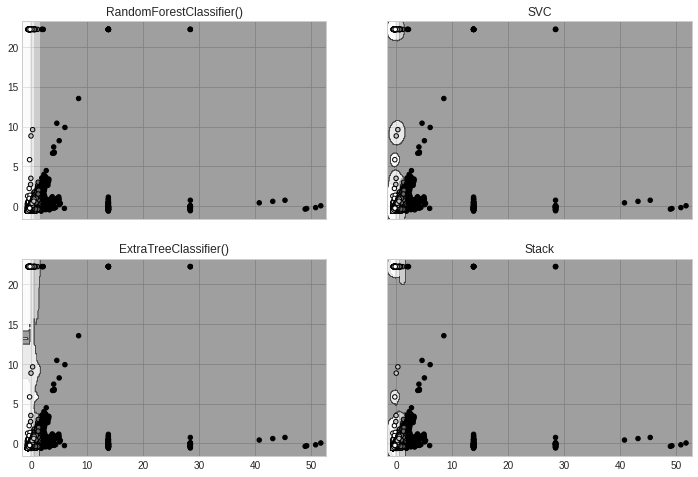

In [30]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, stack],
                          ['RandomForestClassifier()','SVC', 'ExtraTreeClassifier()', 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()